In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('uci-secom.csv')

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
df.shape

(1567, 592)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [7]:
df.isnull().sum().sort_values()

Time       0
360        0
359        0
291        0
255        0
        ... 
85      1341
158     1429
293     1429
292     1429
157     1429
Length: 592, dtype: int64

In [8]:
df['Pass/Fail'].nunique()

2

In [9]:
#drop columns with >50% null values
min_count=df.shape[0]//2+1
df=df.dropna(axis=1,thresh=min_count)

In [10]:
df.shape

(1567, 564)

In [11]:
#drop 0 variance columns
def drop_constants(df):
    """iterate through columns and remove columns with constant values (all same)"""
    for col in df.columns:
        # drop col if unique values is 1
        if df[col].nunique() == 1:
            del df[col]
    return df

In [12]:
df=drop_constants(df)

In [13]:
df.shape

(1567, 448)

In [14]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [15]:
df['Pass/Fail']=df['Pass/Fail'].replace(-1,0).astype(int)

In [16]:
df['Pass/Fail'].value_counts()

0    1463
1     104
Name: Pass/Fail, dtype: int64

### Preprocessing: 
#### 1. Use boruta to do feature selection
#### 2. split data
#### 3. Perform over-sampling using SMOTE


### boruta

In [17]:
from sklearn.model_selection import train_test_split
X1=df.drop(['Time','Pass/Fail'],axis=1)
y=df['Pass/Fail']
print('shape of X:',X1.shape)
print('shape of y:',y.shape)
print(X1.columns)

shape of X: (1567, 446)
shape of y: (1567,)
Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '576', '577', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=446)


In [18]:
#fill null values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
X=imputer.fit_transform(X1)
X=pd.DataFrame(X,columns=X1.columns)


In [19]:
X.head()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432


In [20]:
X.isnull().any().any()

False

In [24]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier


In [25]:
X_boruta=X.values
y_boruta=y.values

In [26]:
clf = RandomForestClassifier()
feat_selector = BorutaPy(clf, random_state=42, verbose=2)
feat_selector.fit(X_boruta, y_boruta)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	446
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	446
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	446
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	446
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	446
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	446
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	446
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	434
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	434
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	434
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	434
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	434
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	434
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	434
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	9
Rejected: 	434
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	8

BorutaPy(estimator=RandomForestClassifier(n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x1F980589C40),
         random_state=RandomState(MT19937) at 0x1F980589C40, verbose=2)

In [33]:
accept_feat=X.columns[feat_selector.support_].to_list()

In [34]:
irresolution=X.columns[feat_selector.support_weak_].to_list()

In [35]:
accept_feat

['38', '59', '64', '65', '103', '153', '348', '426']

In [36]:
#call transform to update X to selected features
X_filtered=X[accept_feat]

In [37]:
X_filtered.shape

(1567, 8)

In [38]:
X_filtered.head()

,38,59,64,65,103,153,348,426
0,86.9555,-1.7264,21.7264,29.5367,-0.0042,0.0167,0.0215,1.7275
1,87.5241,0.8073,19.1927,27.6301,-0.0045,0.0144,0.0142,1.4857
2,84.7327,23.8245,16.1755,24.2829,-0.0026,0.0177,0.0105,1.8268
3,86.6867,24.3791,15.6209,23.4736,-0.0059,0.0150,0.0407,1.5441
4,86.1468,-12.2945,32.2945,44.1498,-0.0045,0.0126,0.0246,1.2943


#### Split data

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X_filtered, y, test_size=0.3, stratify=y, random_state=101)

#### Over-sampling and Under-sampling

In [40]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [41]:
count_class_0 = 150
count_class_1 = 150
pipe = make_pipeline(
    ADASYN(sampling_strategy={1: count_class_1}),
    NearMiss(sampling_strategy={0: count_class_0})
            )

X_oversample, y_oversample=pipe.fit_resample(X_train,y_train)


In [42]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_oversample))

Resampled dataset shape Counter({0: 150, 1: 146})


In [43]:
y_train.value_counts()

0    1023
1      73
Name: Pass/Fail, dtype: int64

In [44]:
y_oversample.value_counts()

0    150
1    146
Name: Pass/Fail, dtype: int64

In [45]:
X_oversample.shape

(296, 8)

### Modelling 
#### 1. Decision Tree
#### 2. Random Forest
#### 3. XGBoost
#### 4. Support Vector Machine
#### 5. Naive Bayes Classifier


### Decision Tree

In [46]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_oversample, y_oversample)

y_pred = tree.predict(X_test)


<AxesSubplot:title={'center':'Confusion Matrix for Decision Tree Classifer'}>

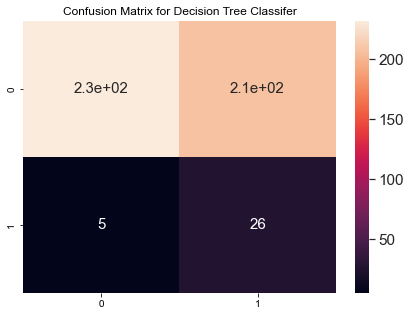

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [48]:
y_test.value_counts()

0    440
1     31
Name: Pass/Fail, dtype: int64

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.98      0.53      0.69       440
           1       0.11      0.84      0.20        31

    accuracy                           0.55       471
   macro avg       0.55      0.68      0.44       471
weighted avg       0.92      0.55      0.65       471



In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6829912023460412

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_oversample, y_oversample)
y_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.99      0.61      0.75       440
           1       0.14      0.90      0.24        31

    accuracy                           0.63       471
   macro avg       0.56      0.76      0.50       471
weighted avg       0.93      0.63      0.72       471



0.7561583577712611

In [55]:
feat_importances=pd.Series(rfc.feature_importances_,index=X_oversample.columns)
feat_importances.sort_values(ascending=False).head(25)

59     0.196569
65     0.137884
64     0.135791
103    0.122140
426    0.106861
348    0.104167
153    0.101006
38     0.095582
dtype: float64

In [56]:
#plot feature importance
def plot_feature_importance(importance,names):
    feature_importance=np.array(importance)
    feature_names=np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df=pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'],ascending=False,inplace=True)
    
    plt.figure(figsize=(10,8))
    
    sns.barplot(x=fi_df['feature_importance'][0:8],y=fi_df['feature_names'][0:20])
    
    plt.title('Feature Importance For Semiconductor Process Failure')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

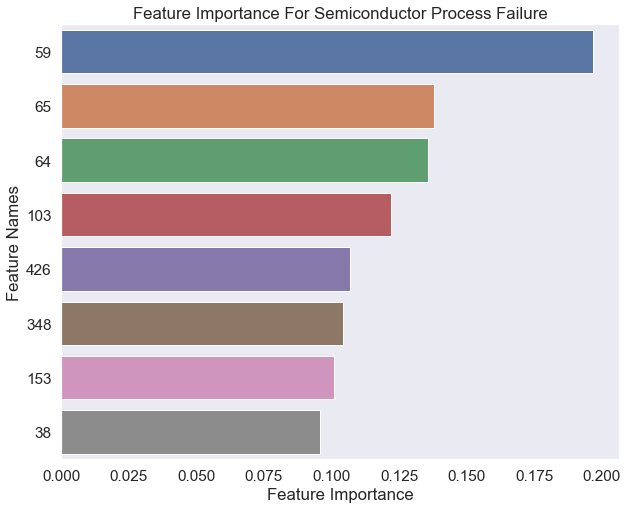

In [57]:
plot_feature_importance(rfc.feature_importances_,X_oversample.columns)

### Random forest and randomized search CV

In [58]:
#Random Forest and Randomized search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=600,num=10)]

#Number of features to consider at every split
max_features=['auto','sqrt']

#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,50,num=10)]

#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,20,30,50,100]

In [59]:
#Create the random grid
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}
random_grid

{'n_estimators': [100, 155, 211, 266, 322, 377, 433, 488, 544, 600],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 'min_samples_split': [2, 5, 10, 15, 20, 30, 50, 100]}

In [60]:
# initialize your estimator
clf_rf=RandomForestClassifier()

#Random search of parameters, using 3 fold cross validation
rf_random=RandomizedSearchCV(estimator=clf_rf,scoring='recall',param_distributions=random_grid,n_iter=50,cv=3,verbose=2,n_jobs=-1)
rf_random.fit(X_oversample, y_oversample)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              30, 50, 100],
                                        'n_estimators': [100, 155, 211, 266,
                                                         322, 377, 433, 488,
                                                         544, 600]},
                   scoring='recall', verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 433,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [62]:
y_pred=rf_random.predict(X_test)

In [63]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.643312101910828


In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.62      0.77       440
           1       0.15      0.90      0.25        31

    accuracy                           0.64       471
   macro avg       0.57      0.76      0.51       471
weighted avg       0.93      0.64      0.73       471



In [65]:
confusion_matrix(y_test,y_pred)

array([[275, 165],
       [  3,  28]], dtype=int64)

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7641129032258064

In [67]:
feat_importances=pd.Series(rf_random.best_estimator_.feature_importances_,index=X_oversample.columns)
feat_importances.sort_values(ascending=False).head(25)

59     0.207074
65     0.135009
64     0.130739
103    0.129452
426    0.105081
153    0.099897
38     0.096622
348    0.096126
dtype: float64

In [68]:
#plot feature importance
def plot_feature_importance(importance,names):
    feature_importance=np.array(importance)
    feature_names=np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df=pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'],ascending=False,inplace=True)
    
    plt.figure(figsize=(10,8))
    
    sns.barplot(x=fi_df['feature_importance'][0:8],y=fi_df['feature_names'][0:20])
    
    plt.title('Feature Importance For Semiconductor Process Failure')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

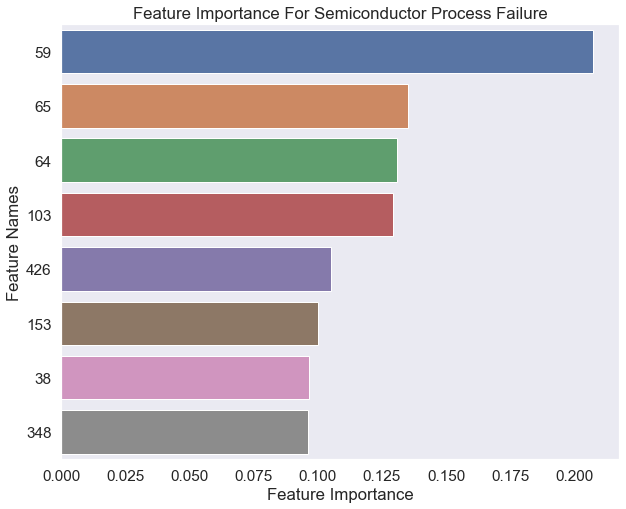

In [69]:
plot_feature_importance(rf_random.best_estimator_.feature_importances_,X_oversample.columns)

In [119]:
from sklearn.metrics import roc_curve
y_score=rf_random.predict_proba(X_test)[:,1]

In [120]:
fpr,tpr,threshold=roc_curve(y_test,y_score)

In [121]:
print('roc_auc_score for randomized random forest:',roc_auc_score(y_test,y_score))

roc_auc_score for randomized random forest: 0.7909090909090909


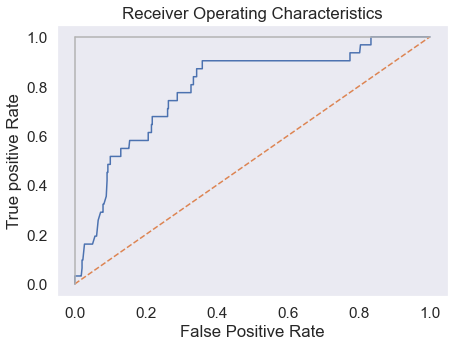

In [122]:
plt.figure()
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.7')
plt.plot([1,1],c='.7')
plt.ylabel('True positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [128]:
gmean=np.sqrt(tpr*(1-fpr))
index=np.argmax(gmean)
thresholdOpt=round(threshold[index],ndigits=4)
fprOpt=round(fpr[index],ndigits=4)
tprOpt=round(tpr[index],ndigits=4)
gmeanOpt=round(gmean[index],ndigits=4)

In [130]:
print('Best Threshold:{} with G-mean:{}'.format(thresholdOpt,gmeanOpt))
print('FRP:{},TPR:{}'.format(fprOpt,tprOpt))

Best Threshold:0.5173 with G-mean:0.7608
FRP:0.3591,TPR:0.9032


In [132]:
def calc_metrics(labels_test, test_probs, threshold = 0.5):
    scores = [1 if x>=threshold else 0 for x in test_probs]
    auc = metrics.roc_auc_score(labels_test, test_probs)
    kappa = metrics.cohen_kappa_score(labels_test,scores)
    confusion = metrics.confusion_matrix(labels_test,scores, labels=list(set(labels_test)))
    print('thresh: %.2f, kappa: %.3f, AUC test-set: %.3f'%(threshold, kappa, auc))
    print(confusion)
    print(metrics.classification_report(labels_test,scores))
    return 

In [134]:
calc_metrics(y_test,y_score,threshold=thresholdOpt)

thresh: 0.52, kappa: 0.164, AUC test-set: 0.791
[[282 158]
 [  3  28]]
              precision    recall  f1-score   support

           0       0.99      0.64      0.78       440
           1       0.15      0.90      0.26        31

    accuracy                           0.66       471
   macro avg       0.57      0.77      0.52       471
weighted avg       0.93      0.66      0.74       471



### SVM


In [108]:
from sklearn.svm import SVC

svc  = SVC(class_weight='balanced')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Training Accuracy :", svc.score(X_oversample, y_oversample))
print("Testing Accuracy :", svc.score(X_test, y_test))

Training Accuracy : 0.7195945945945946
Testing Accuracy : 0.8577494692144374


In [109]:
confusion_matrix(y_test,y_pred)

array([[385,  55],
       [ 12,  19]], dtype=int64)

In [110]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 0.1, 0.0001, 0.000001], 'kernel': ['linear', 'rbf'], 'gamma': [0.0000001, 0.0001, 0.001, 0.01]}]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 2,
                           n_jobs = -1)


grid_search = grid_search.fit(X_oversample,y_oversample)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [111]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameters :", best_parameters)

Best Accuracy:  1.0
Best Parameters : {'C': 1, 'gamma': 1e-07, 'kernel': 'rbf'}


In [112]:
y_pred=grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))


[[  0 440]
 [  0  31]]


In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       440
           1       0.07      1.00      0.12        31

    accuracy                           0.07       471
   macro avg       0.03      0.50      0.06       471
weighted avg       0.00      0.07      0.01       471



C:\Users\Yang Zhang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yang Zhang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yang Zhang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

nb.fit(X_oversample, y_oversample)

y_pred = nb.predict(X_test)

print("Training Accuracy :", nb.score(X_oversample, y_oversample))
print("Testing Accuracy :", nb.score(X_test, y_test))
print(confusion_matrix(y_test,y_pred))

Training Accuracy : 0.8074324324324325
Testing Accuracy : 0.6794055201698513
[[295 145]
 [  6  25]]


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80       440
           1       0.15      0.81      0.25        31

    accuracy                           0.68       471
   macro avg       0.56      0.74      0.52       471
weighted avg       0.93      0.68      0.76       471



In [78]:
roc_auc_score(y_test,y_pred)

0.7384530791788855

In [79]:
from sklearn.model_selection import GridSearchCV

parameters = [{'priors': [None], 'var_smoothing': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]}]

grid_search = GridSearchCV(estimator = nb, param_grid = parameters, scoring = 'recall', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(X_oversample, y_oversample)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [80]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.4863013698630137
Best Parameter:  {'priors': None, 'var_smoothing': 1.0}


In [81]:
y_pred=grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[376  64]
 [ 12  19]]


In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       440
           1       0.23      0.61      0.33        31

    accuracy                           0.84       471
   macro avg       0.60      0.73      0.62       471
weighted avg       0.92      0.84      0.87       471



In [83]:
roc_auc_score(y_test,y_pred)

0.733724340175953

### XgBoost

In [84]:
!pip install xgboost

In [85]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb= XGBClassifier()

xgb.fit(X_oversample, y_oversample)

y_pred =xgb.predict(X_test)
print("Training Accuracy :", xgb.score(X_oversample, y_oversample))
print("Testing Accuracy :", xgb.score(X_test, y_test))

[17:45:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 1.0
Testing Accuracy : 0.6369426751592356


C:\Users\Yang Zhang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [86]:
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 10, 5, 7]}]

grid_search = GridSearchCV(estimator =xgb, param_grid = parameters, scoring = 'recall', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(X_oversample, y_oversample)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

[17:45:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yang Zhang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [87]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.7945205479452054
Best Parameter:  {'max_depth': 5}


In [88]:


grid_search.fit(X_oversample,y_oversample)

y_pred = grid_search.predict(X_test)

print("Training Accuracy :", grid_search.score(X_oversample,y_oversample))
print("Testing Accuracy :", grid_search.score(X_test, y_test))

[17:45:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 1.0
Testing Accuracy : 0.8064516129032258


C:\Users\Yang Zhang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [89]:
print(confusion_matrix(y_test,y_pred))

[[272 168]
 [  6  25]]


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76       440
           1       0.13      0.81      0.22        31

    accuracy                           0.63       471
   macro avg       0.55      0.71      0.49       471
weighted avg       0.92      0.63      0.72       471



In [91]:
roc_auc_score(y_test,y_pred)

0.712316715542522

### K-Nearest Neighbors Classifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_oversample,y_oversample)
y_pred=knn.predict(X_test)
print("Training Accuracy :", knn.score(X_oversample, y_oversample))
print("Testing Accuracy :", knn.score(X_test, y_test))

Training Accuracy : 0.8277027027027027
Testing Accuracy : 0.70276008492569


In [93]:
print(confusion_matrix(y_test,y_pred))

[[309 131]
 [  9  22]]


In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.70      0.82       440
           1       0.14      0.71      0.24        31

    accuracy                           0.70       471
   macro avg       0.56      0.71      0.53       471
weighted avg       0.92      0.70      0.78       471



In [95]:
print(roc_auc_score(y_test,y_pred))

0.7059750733137831


### Ada Boost Classifier

In [96]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(X_oversample,y_oversample)
y_pred=ada.predict(X_test)
print("Training Accuracy :", ada.score(X_oversample, y_oversample))
print("Testing Accuracy :", ada.score(X_test, y_test))

Training Accuracy : 0.9256756756756757
Testing Accuracy : 0.5690021231422505


In [97]:
print(confusion_matrix(y_test,y_pred))

[[244 196]
 [  7  24]]


In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.55      0.71       440
           1       0.11      0.77      0.19        31

    accuracy                           0.57       471
   macro avg       0.54      0.66      0.45       471
weighted avg       0.92      0.57      0.67       471



In [99]:
roc_auc_score(y_test,y_pred)

0.6643695014662756

### Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_oversample,y_oversample)
y_pred=gbc.predict(X_test)
print("Training Accuracy :", gbc.score(X_oversample, y_oversample))
print("Testing Accuracy :", gbc.score(X_test, y_test))

Training Accuracy : 0.9898648648648649
Testing Accuracy : 0.6411889596602972


In [101]:
print(confusion_matrix(y_test,y_pred))

[[274 166]
 [  3  28]]


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76       440
           1       0.14      0.90      0.25        31

    accuracy                           0.64       471
   macro avg       0.57      0.76      0.51       471
weighted avg       0.93      0.64      0.73       471



In [103]:
roc_auc_score(y_test,y_pred)

0.7629765395894429

### Random forest based on X_train, y_train

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc_1=RandomForestClassifier(class_weight='balanced')
rfc_1.fit(X_train, y_train)
y_pred = rfc_1.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



C:\Users\Yang Zhang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yang Zhang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yang Zhang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5